In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Loading Data and Taking a Quick Look:

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


**info()** method returns the total number of rows, and each attribute's type and number of non-null values.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**distplot()** method returns a distribution plot for 'SalePrice'.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_17/1416632486.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], color='b', bins = 100);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


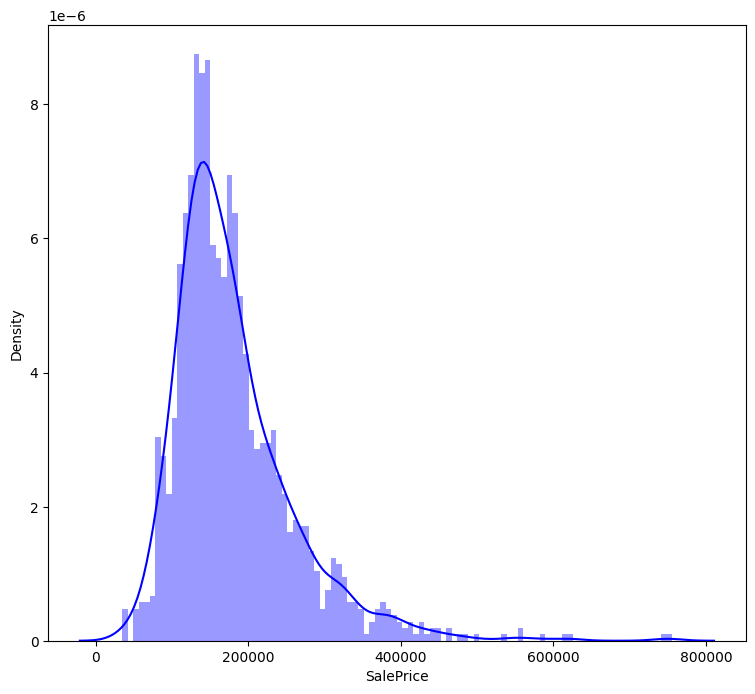

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(train_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df['SalePrice'], color='b', bins = 100);

# Data Preparation:

**Store** 'Id':

In [5]:
test_ids = test_df["Id"]

**Drop** 'Id' **column** as it is not necessary for the model:

In [6]:
train_df = train_df.drop("Id", axis = 1)
test_df = test_df.drop("Id", axis = 1)

# Spliting the Data:

**Define a 'split_dataset' function** to generate a random split of the dataset:

**test_ratio** specifies the proportion of data to assign to the validation (test) set (for example, if test_ratio=0.10, 10% of the dataset will be used for validation, and 90% will be used for training)

**np.random.rand(len(dataset))** generates an array of random numbers between 0 and 1, with each number corresponding to a row in dataset.

**< test_ratio** checks if each random number is less than test_ratio and creates a boolean array, test_indices, where True indicates that the row should go into the validation set, and False indicates it should go into the training set.

In [7]:
def split_dataset(dataset, test_ratio=0.10):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]


**dataset[~test_indices]**: The *tilde ~ operator inverts the boolean array*, so this line selects the rows where test_indices is False (training set).

**dataset[test_indices]**: Selects the rows where test_indices is True (validation set).

**Spliting** the data into a **training** and a **validation set**:

In [8]:
train_ds_pd, valid_ds_pd = split_dataset(train_df)
print("{} examples in training, {} examples in validation.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1318 examples in training, 142 examples in validation.


# Random Forest Model:

**Setting** the target label:

In [9]:
label = 'SalePrice'

**Converting** pandas dataframes **into TensorFlow datasets** for a regression task to ensure that the data is in a format that TF-DF models expect:

In [10]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task = tfdf.keras.Task.REGRESSION)

**Initializing a Random Forest model** that will perform a **regression task** using TensorFlow Decision Forests:

In [11]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

Use /tmp/tmpxmisbdw5 as temporary training directory


**Preparing the model** to be trained and evaluated:

In [12]:
rf.compile(metrics = ["rmse"]) 

Note that the above step is *optional*, but you can include it if you want to specify a list of evaluation metrics for your model.

**Fit** the model:

In [13]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:06.606943. Found 1318 examples.
Training model...


[INFO 24-10-30 21:29:52.2029 UTC kernel.cc:1233] Loading model from path /tmp/tmpxmisbdw5/model/ with prefix 84491c14a16342eb


Model trained in 0:00:02.803544
Compiling model...


[INFO 24-10-30 21:29:52.6701 UTC decision_forest.cc:734] Model loaded with 300 root(s), 124940 node(s), and 73 input feature(s).
[INFO 24-10-30 21:29:52.6702 UTC abstract_model.cc:1362] Engine "RandomForestOptPred" built
[INFO 24-10-30 21:29:52.6703 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


**Visualize** *first* decision tree (for depth *3*):

In [14]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Note you can "play" with the parameters 'tree_idx' and 'max_depth' to visualize different trees (and their stracture for different depths).

# Evaluate Model:

Make **predictions** on the **validation set**:

In [15]:
val_pred = rf.predict(valid_ds).squeeze()

1/1 [==============================] - 0s 224ms/step


**squeeze()** method removes single-dimensional entries from the shape of the predictions array (for example, turning something like [100, 1] into [100]) 

Note this is particularly useful for regression predictions, where each prediction is a single value per sample.

**Extracting the true values of SalePrice** from the validation dataframe:

In [16]:
y_val = valid_ds_pd['SalePrice']

**Converting** a **NumPy array** (val_pred) to a **Pandas Series**:

In [17]:
val_pred = pd.Series(val_pred)

**Calculate RMSE:**

In [18]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(np.log(y_val), np.log(val_pred)))
print(f"Validation Performance: {rmse}")

Validation Performance: 0.12752503369782262


# Predictions:

In [19]:
predictions = rf.predict(test_ds)

2/2 [==============================] - 1s 24ms/step


# Submission:

In [20]:
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions.squeeze()})

In [21]:
submission.to_csv('/kaggle/working/submission.csv', index=False)